In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Cargar datos de imagenes

In [3]:
# Cargar datos de imagenes
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 37s 3us/step


In [4]:
# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255 # Normalizar a rango [0, 1]

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)), # Añadir canal de color
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Primera capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)),# Capa de pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Segunda capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)),# Capa de pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),# Tercera capa convolucional
    tf.keras.layers.Flatten(),# Aplanar la salida
    tf.keras.layers.Dense(64, activation='relu'),# Capa densa 
    tf.keras.layers.Dense(10, activation='softmax')# Capa de salida a 10 clases
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 
# para compilar el modelo se ocupa el optimizador adam y 
# la funcion de perdida sparse_categorical_crossentropy y 
# la metrica de accuracy para evaluar el rendimiento del modelo

In [ ]:
# Entrenar el modelo
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, 
          epochs=5, 
          validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))
# Para entrenar el modelo se debe reshapear las imagenes a 4 dimensiones porque cada imagen es de 28x28 y 
# el modelo espera una entrada de 4 dimensiones (batch_size, altura, anchura, canales)
# y se entrena por 5 epocas con los datos de prueba como validacion

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.8847 - loss: 0.3611 - val_accuracy: 0.9864 - val_loss: 0.0413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9819 - loss: 0.0585 - val_accuracy: 0.9847 - val_loss: 0.0524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9861 - loss: 0.0452 - val_accuracy: 0.9868 - val_loss: 0.0461
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9884 - loss: 0.0393 - val_accuracy: 0.9878 - val_loss: 0.0380
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9903 - loss: 0.0343 - val_accuracy: 0.9885 - val_loss: 0.0474


In [ ]:
# Evaluacion del modelo
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) 
# Evaluar el modelo con los datos de prueba
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9850 - loss: 0.0610
Test accuracy: 0.9884999990463257
Test loss: 0.04744759202003479


In [11]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
# 1) Predicciones del modelo
y_proba = model.predict(x_test.reshape(-1, 28, 28, 1), verbose=0) # Obtener probabilidades predichas
# Convertir probabilidades a etiquetas predichas
y_pred = y_proba.argmax(axis=1) # Obtener la clase con mayor probabilidad

In [ ]:
# 2) Etiquetas verdaderas (manejar el caso de que y_test esté en formato one-hot o enteros)
y_true = y_test.argmax(axis=1) if y_test.ndim == 2 else y_test

# (opcional) nombres de las clases
num_classes = y_proba.shape[1]
class_names = [str(i) for i in range(num_classes)]

In [ ]:
# 3) Matriz de confusión (cruda y normalizada por fila)
cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
cm_norm = confusion_matrix(y_true, y_pred, labels=range(num_classes), normalize='true')

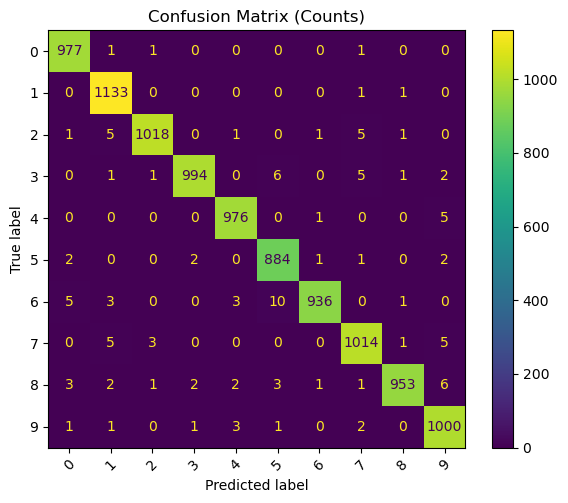

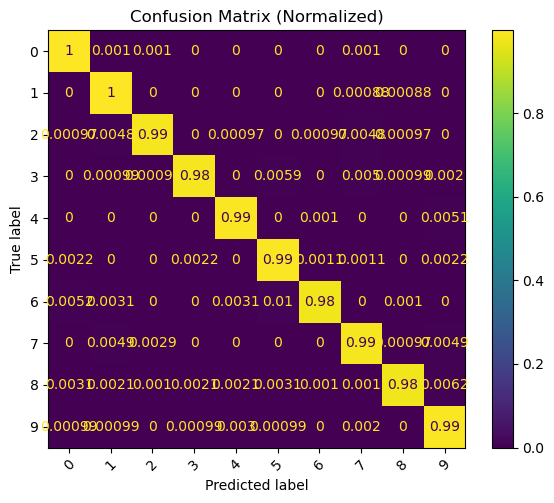

In [21]:
# 4) Visualización de la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(ax=ax, xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix (Counts)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm_norm, display_labels=class_names).plot(ax=ax, xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix (Normalized)')
plt.tight_layout()
plt.show()

In [23]:
# 5) Métricas de clasificación
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9879    0.9969    0.9924       980
           1     0.9844    0.9982    0.9913      1135
           2     0.9941    0.9864    0.9903      1032
           3     0.9950    0.9842    0.9895      1010
           4     0.9909    0.9939    0.9924       982
           5     0.9779    0.9910    0.9844       892
           6     0.9957    0.9770    0.9863       958
           7     0.9845    0.9864    0.9854      1028
           8     0.9948    0.9784    0.9865       974
           9     0.9804    0.9911    0.9857      1009

    accuracy                         0.9885     10000
   macro avg     0.9885    0.9884    0.9884     10000
weighted avg     0.9886    0.9885    0.9885     10000



In [27]:
# 6) Guardar el modelo entrenado
import pandas as pd 
pd.DataFrame(cm, index=class_names, columns=class_names).to_csv('confusion_matrix_v1.csv', encoding='utf-8', index=True)
pd.DataFrame(cm_norm, index=class_names, columns=class_names).to_csv('confusion_matrix_norm_v1.csv', encoding='utf-8', index=True)